Elizabeth Vaisman 318775277

Group: EM

In [8]:
import numpy as np
import os, math
from numpy import genfromtxt
import matplotlib.pyplot as plt
from scipy.signal.windows import gaussian

Q1: 

In [9]:
current_directory = os.getcwd()
noisy_sig_path = os.path.join(current_directory,'noisy_signal.csv')
noisy_sig = genfromtxt(fname=noisy_sig_path, delimiter=',')

Text(0, 0.5, 'Amplitude')

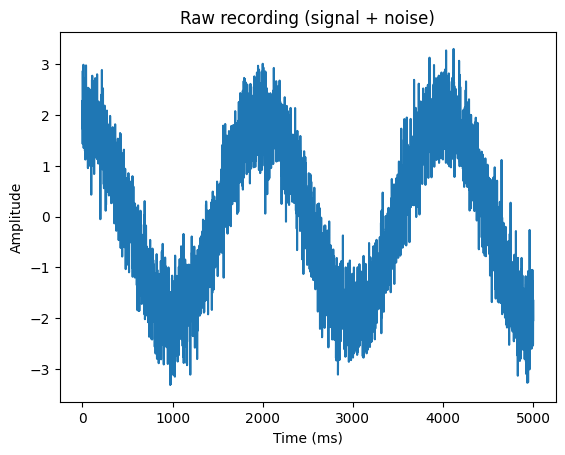

In [10]:
fig, ax = plt.subplots()
plt.plot(noisy_sig)
ax.set_title("Raw recording (signal + noise)")
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Amplitude")

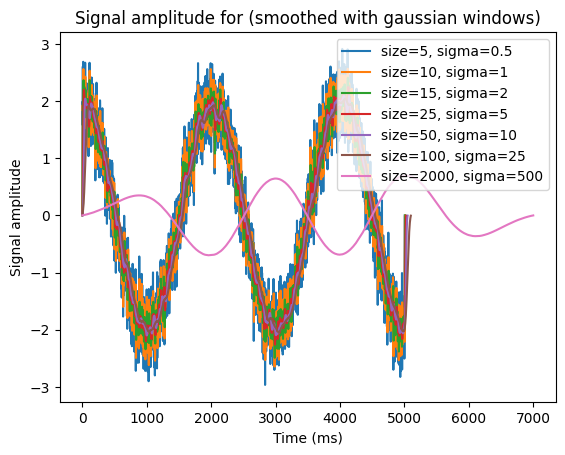

In [11]:
# window sizes and sigmas for convolution
window_sizes = [5, 10, 15, 25, 50, 100, 2000] 
sigmas = [0.5, 1, 2, 5, 10, 25, 500]

ranges, norms, conv_res = [], [], []
fig, ax = plt.subplots()
for size, sigma in zip(window_sizes, sigmas):
    # range of the caussian window around 0
    gauss_range = np.arange(-size/2, size/2+1) 
    # create the gaussian window using the function
    gauss_window = np.exp(-(gauss_range/sigma)**2/2)
    # normalize gaussian to an area of 1
    gauss_norm = gauss_window/sum(gauss_window)
    # convolve with signal
    convolution_result = np.convolve(a=noisy_sig, v=gauss_norm)
    # save the steps of analyses for further use
    ranges.append(gauss_range), norms.append(gauss_norm), conv_res.append(convolution_result)
    plt.plot(convolution_result, label=f'size={size}, sigma={sigma}')
ax.legend(loc='upper right')
ax.set_title("Signal amplitude for (smoothed with gaussian windows)")
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Signal amplitude")
plt.show()



Q1: b

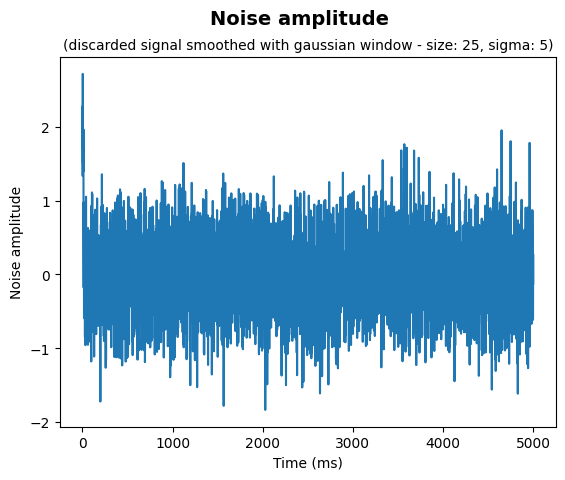

In [12]:
fig, ax = plt.subplots()
# subtract clean signal (recieved by convolution) from actual recording
signal = conv_res[3][0:5000]
noise = noisy_sig - signal
plt.plot(noise)
plt.suptitle("Noise amplitude", fontsize=14, fontweight ='bold')
ax.set_title("(discarded signal smoothed with gaussian window - size: 25, sigma: 5)", fontdict={'fontsize': 10})
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Noise amplitude")
plt.show()

In [13]:
SNR = 10*math.log(np.mean(signal**2)/ np.mean(noise**2), 10)
print(f'SNR for gaussian window size=50, sigma= 10 is {SNR:.3f} dB')

SNR for gaussian window size=50, sigma= 10 is 8.802 dB


Q2:

a)

fr for whole baseline is 0.0203 spikes/ms


Text(0, 0.5, 'Firing rate (spikes/ms)')

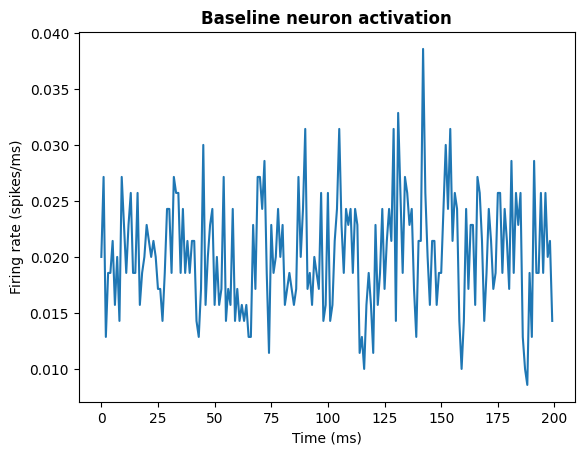

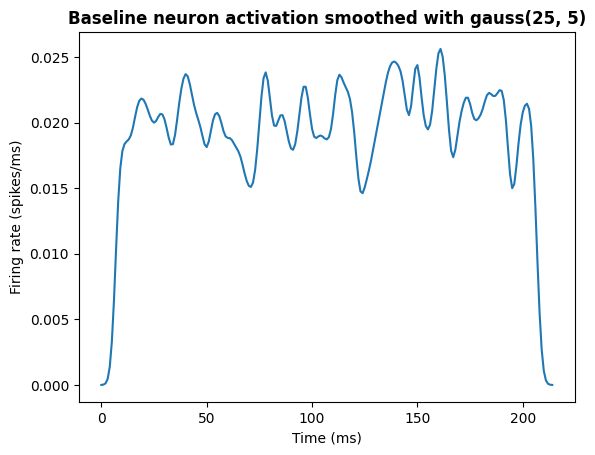

In [ ]:
# q2data shape: 14 waves * 50 trials * 1000 ms
q2data = np.load(file='q2data.pkl', allow_pickle=True)
stimulus_onset = 0.2 # sec
stimulus_offset = 0.2 + 0.4 #sec
record_len = 1 #sec
# baseline is first 200 ms = first 200 samples
baseline_samples = int(stimulus_onset*q2data.shape[2]) 
baseline_data = q2data[:, :, 0:baseline_samples] 
# average fr over all trials and wavelengths for baseline
mean_all = np.mean(baseline_data) 
print(f'fr for whole baseline is {mean_all:.4f} spikes/ms')
mean_trials = np.mean(baseline_data, axis=1)
mean_waves= np.mean(mean_trials, axis=0)
base_conv = np.convolve(mean_waves, norms[2])

plt.plot(mean_waves)
plt.title("Baseline neuron activation", fontweight="bold")
plt.xlabel("Time (ms)")
plt.ylabel("Firing rate (spikes/ms)")

plt.figure()
plt.plot(base_conv)
plt.title("Baseline neuron activation smoothed with gauss(25, 5)", fontweight="bold")
plt.xlabel("Time (ms)")
plt.ylabel("Firing rate (spikes/ms)")

b + c + d)

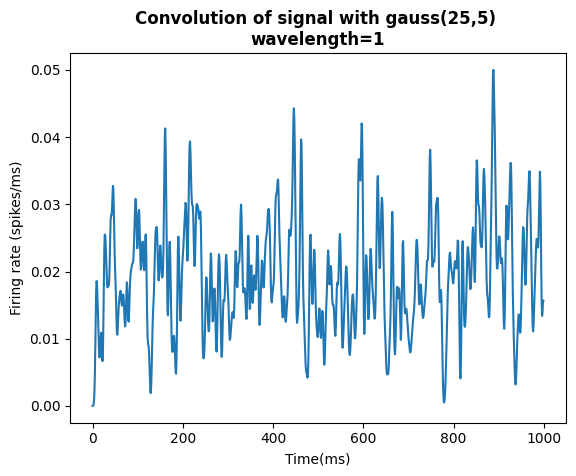

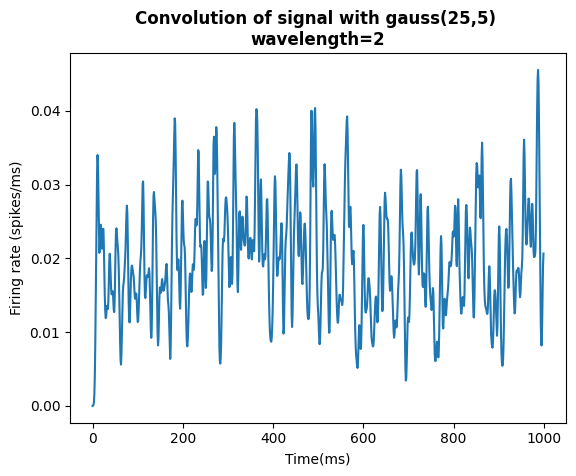

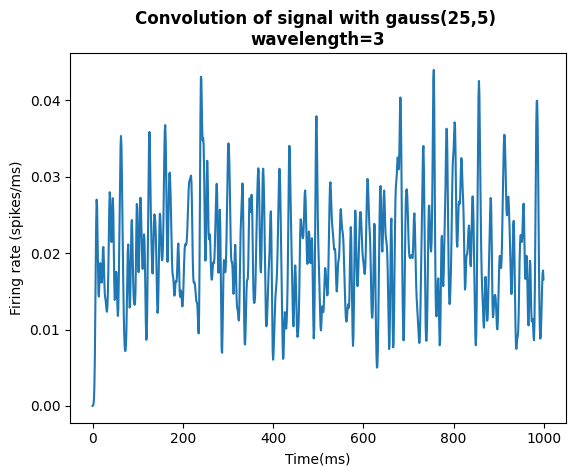

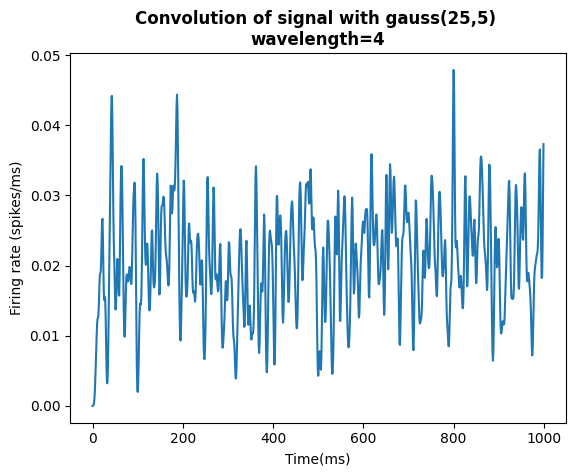

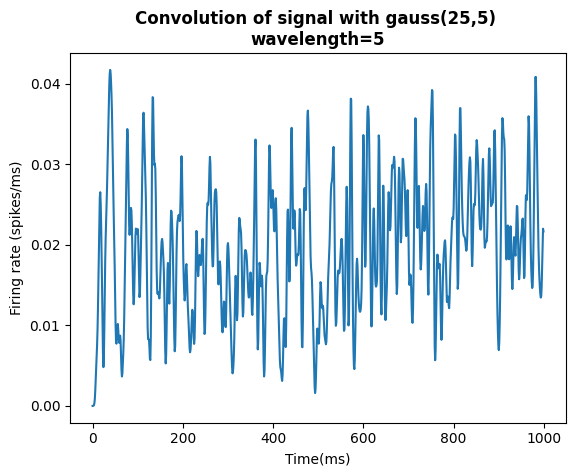

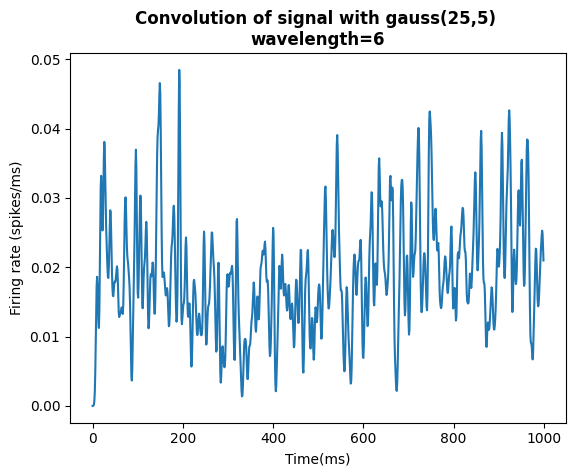

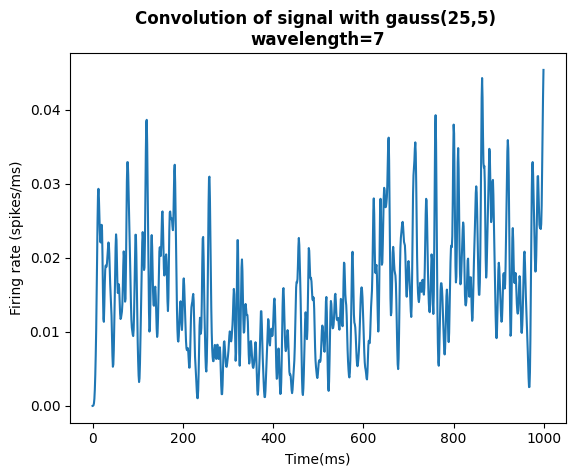

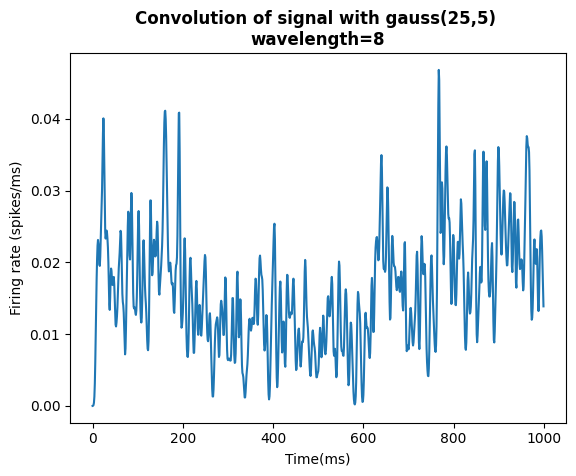

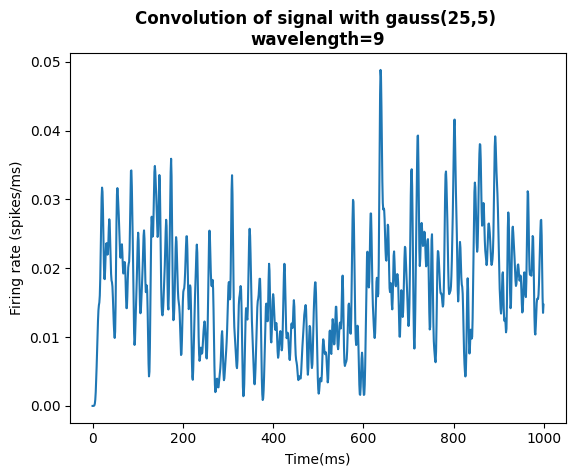

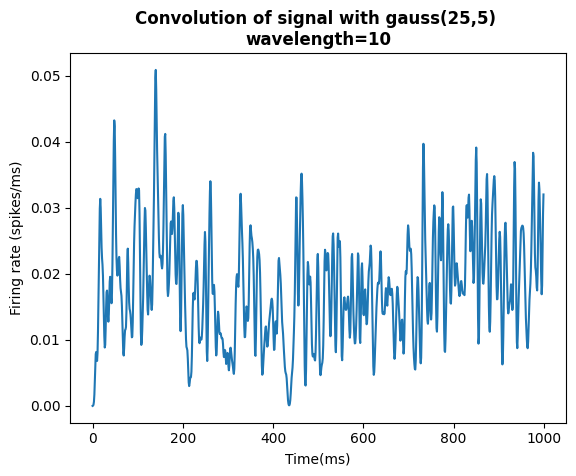

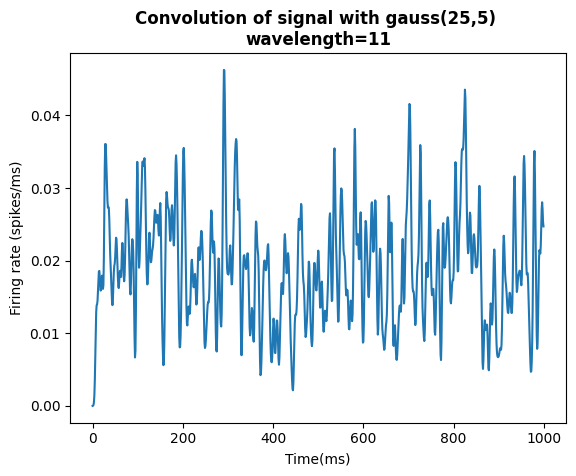

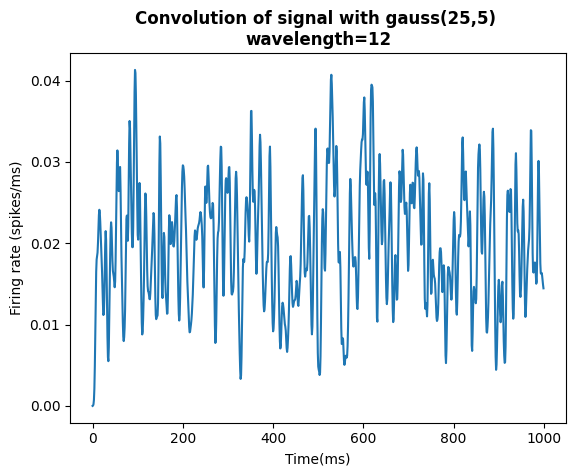

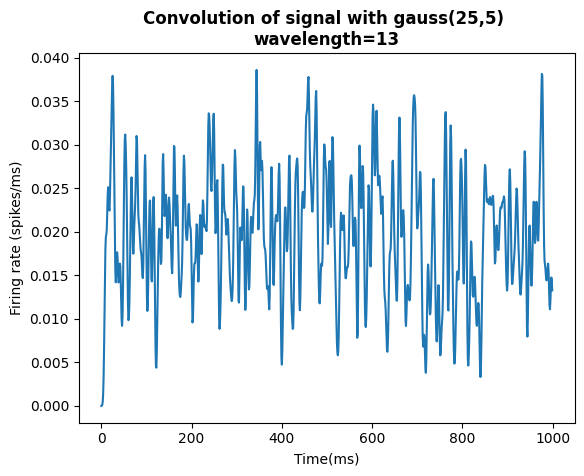

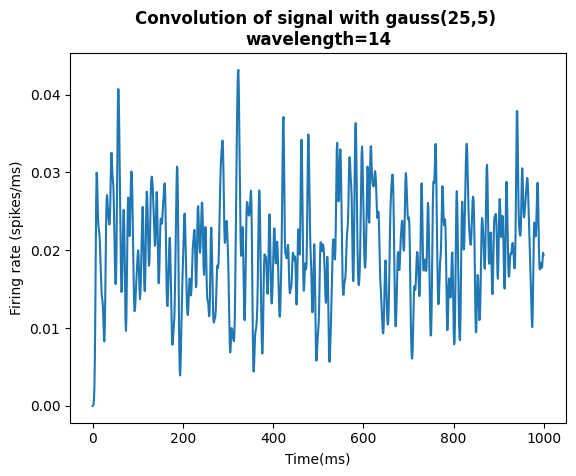

In [ ]:
mean_trials = np.mean(q2data, axis=1) # averaging over trials
for i, mean_for_wave in enumerate(mean_trials):
    fig1, ax1 = plt.subplots()
    # convolve signal with gaussian window to get assumed firing rate for each wavelength across time
    ax1.plot(range(0,1000), np.convolve(mean_for_wave, norms[2])[0:1000]) 
    ax1.set_title("Convolution of signal with gauss(25,5) \n" \
    f"wavelength={i+1}", fontweight="bold")
    ax1.set_xlabel("Time(ms)")
    ax1.set_ylabel("Firing rate (spikes/ms)")

In [ ]:
# check the desired length of the gaussian model such that the mean will be 8. (for the following cell)
print("Gaussian lengeth:", len(np.arange(1,15.25, 0.25)), "mean:", np.mean(np.arange(1,15.25, 0.25)))

# the length of the model that will use for graphic purposes (until 14 cause we have only 14 wavelengths) (for the following cell)
print("Gaussian length for visualization:", len(np.arange(1,14, 0.25)))

Gaussian lengeth: 57 mean: 8.0
Gaussian length for visualization: 52


Firing rate results (spikes/ms): [0.0194, 0.0216, 0.0199, 0.0192, 0.0169, 0.0151, 0.0099, 0.0106, 0.0111, 0.0147, 0.0177, 0.0196, 0.0212, 0.0197]


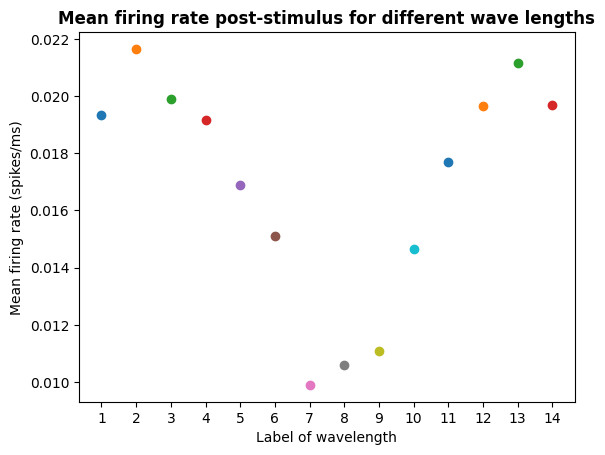

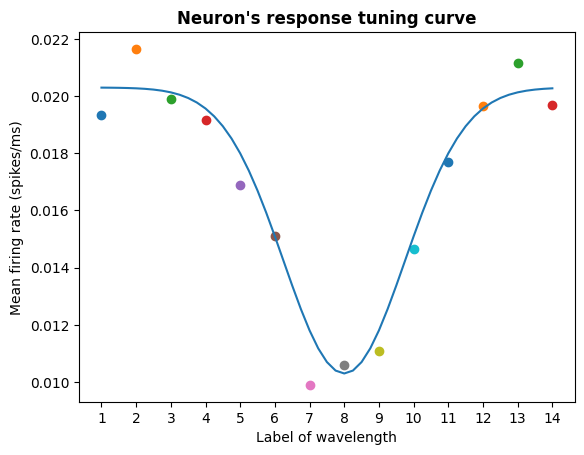

In [ ]:
 # remove type printing when printing results
np.set_printoptions(legacy='1.25')
# time frame taken according to evident decrease in rate for several wavelengths during this period
post_stim_data = q2data[:, :, 200:600] 
# averaging over trials
mean_trials = np.mean(post_stim_data, axis=1) 
results_vec = []
fig, ax = plt.subplots()
fig1, ax1 = plt.subplots()
# go over temporal results for each wavelength
for  i in range(mean_trials.shape[0]): 
    # averaging over time - average firing rate for wave length in 200-600ms of recording
    mean = np.mean(mean_trials[i]) 
    results_vec.append(round(mean,4))
    ax.scatter(i+1, mean)
    ax1.scatter(i+1, mean)
# scatter
print(f"Firing rate results (spikes/ms): {results_vec}")
ax.set_title("Mean firing rate post-stimulus for different wave lengths", fontweight="bold")
ax.set_xlabel("Label of wavelength")
ax.set_ylabel("Mean firing rate (spikes/ms)")
ax.set_xticks(list(range(1,15)))

# model for data inverted gaussian with amplitude 0.01, centered around 8, std=7, offset 0.0203
model = -0.01*gaussian(57,7)+0.0203

ax1.plot(list(np.arange(1,14.25, 0.25)), model[:53])
ax1.set_title("Neuron's response tuning curve", fontweight="bold")
ax1.set_xlabel("Label of wavelength")
ax1.set_ylabel("Mean firing rate (spikes/ms)")
ax1.set_xticks(list(range(1,15)))

Q3:

In [19]:
spk1, spk2 = genfromtxt(fname="spk1.csv"), genfromtxt(fname="spk2.csv")
spk1_ms, spk2_ms = spk1*1000, spk2*1000 # spike times in ms
spk1_ms, spk2_ms = spk1_ms.astype(int), spk2_ms.astype(int)
record_len = 50 # sec

$$Fano Factor (spikes) = {var(spikes) \over mean(spikes)}$$
$$Coefficient of Variation (ISI) = {std(ISI) \over mean(ISI)}$$

In [ ]:
def cal_ff(spike_train, window_len_ms):
    """Calculate FF by taking snippets of signal in constant time frame and finding the average and variance
    across all windows"""

    count_vec = []
    for i in range(int(len(spike_train)/window_len_ms)):
        snippet = spike_train[i*window_len_ms:(i+1)*window_len_ms]
        count_vec.append(np.sum(snippet))
    FF = np.var(count_vec)/np.mean(count_vec)  
    return FF

In [ ]:
def cal_cv(spike_train):
    """
    Calculate Cv, finding all possible ISIs in the spike train, averaging and finding the STD.
    """

    ISIs = [[]]
    ISIs_len = []
    
    # finding the bounds where ISIs could be defined.
    idx_first = np.where(spike_train==1)[0][0]
    idx_last = np.where(spike_train==1)[0][-1]

    snippet = spike_train[idx_first:idx_last]

    for place in snippet:
        # if this place in snippet has 1, append to ISIs list an empty list, to create seperation between the ISI lists
        if place == 1:
            ISIs.append([])

        # otherwise append the 0 to the last ISI list.
        else:
            ISIs[-1].append(place)

    for ISI in ISIs:
        # only if the list is not empty, meaning a valid ISI, proceed
        if ISI: 
            ISIs_len.append(len(ISI)) # Append the lengths of all valid ISIs to the list
        
    Cv = np.std(ISIs_len) / np.mean(ISIs_len)

    return Cv

In [35]:
# initiate spike trains
spike_train1, spike_train2 = np.zeros(record_len*1000), np.zeros(record_len*1000)
# insert the spikes into the trains
spike_train1[spk1_ms],  spike_train2[spk2_ms]= 1, 1

# Calculate FF with a window of 1000 ms
FF1 = cal_ff(spike_train1, 1000)
Cv1 = cal_cv(spike_train1)

FF2 = cal_ff(spike_train2, 1000)
Cv2 = cal_cv(spike_train2)


print(f"Results for 1 sec window: \n FF1 = {FF1}, Cv1 = {Cv1} " \
f"\n FF2 = {FF2}, Cv2 = {Cv2}")

Results for 1 sec window: 
 FF1 = 0.058076152304609205, Cv1 = 0.127423395914091 
 FF2 = 608.6663574351977, Cv2 = 2.2718555754985745


In [36]:
# Calculate FF with a window of 50 ms
FF1 = cal_ff(spike_train1, 50)
Cv1 = cal_cv(spike_train1)

FF2 = cal_ff(spike_train2, 50)
Cv2 = cal_cv(spike_train2)

print(f"Results for 50 ms window: \n FF1 = {FF1}, Cv1 = {Cv1} " \
f"\n FF2 = {FF2}, Cv2 = {Cv2}")

Results for 50 ms window: 
 FF1 = 0.5009999999999999, Cv1 = 0.127423395914091 
 FF2 = 32.82731514324693, Cv2 = 2.2718555754985745
